In [1]:
import menpo.io as mio
from menpo.visualize import print_progress
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh

path_to_images = '/Users/ruslan/dev/tensorfaces/lfpw/trainset/'
training_images = []
for img in print_progress(mio.import_images(path_to_images, verbose=True)):
    # convert to greyscale
    if img.n_channels == 3:
        img = img.as_greyscale()
    # crop to landmarks bounding box with an extra 20% padding
    img = img.crop_to_landmarks_proportion(0.2)
    # rescale image if its diagonal is bigger than 400 pixels
    d = img.diagonal()
    if d > 400:
        img = img.rescale(400.0 / d)
    # define a TriMesh which will be useful for Piecewise Affine Warp of HolisticAAM
    labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    # append to list
    training_images.append(img)



Found 811 assets, index the returned LazyList to import.
[====================] 100% (811/811) - done.                                   


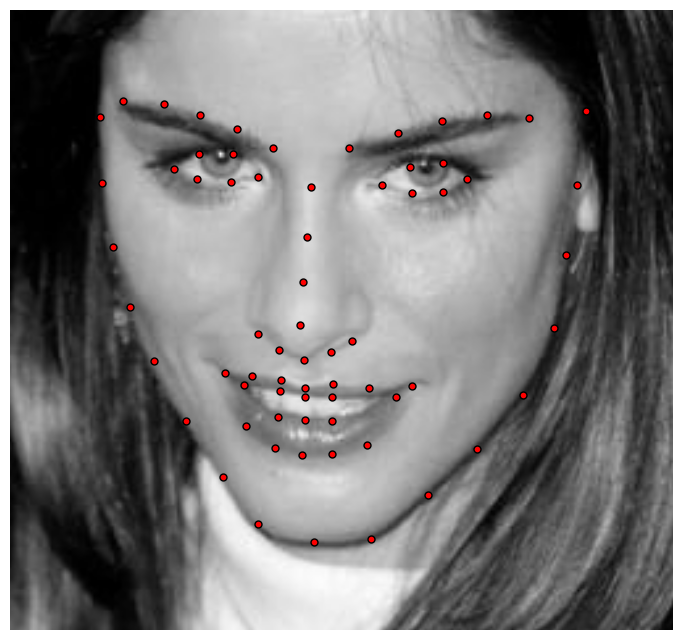

In [2]:
%matplotlib inline
from menpowidgets import visualize_images
visualize_images(training_images)

In [3]:
from menpofit.aam import HolisticAAM
from menpo.feature import fast_dsift

aam = HolisticAAM(training_images, group='face_ibug_68_trimesh', diagonal=150,
                  scales=(0.5, 1.0), holistic_features=fast_dsift, verbose=True,
                  max_shape_components=20, max_appearance_components=150)


- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (811/811) - done.                  
  - Scale 0: Doneding appearance model                                          aining
  - Scale 1: Doneding appearance model                                          
                                                              

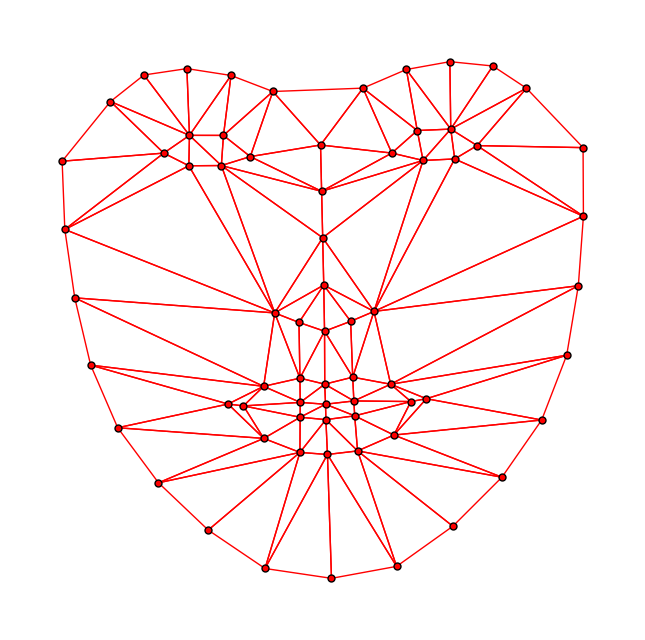

In [4]:
aam.view_shape_models_widget()

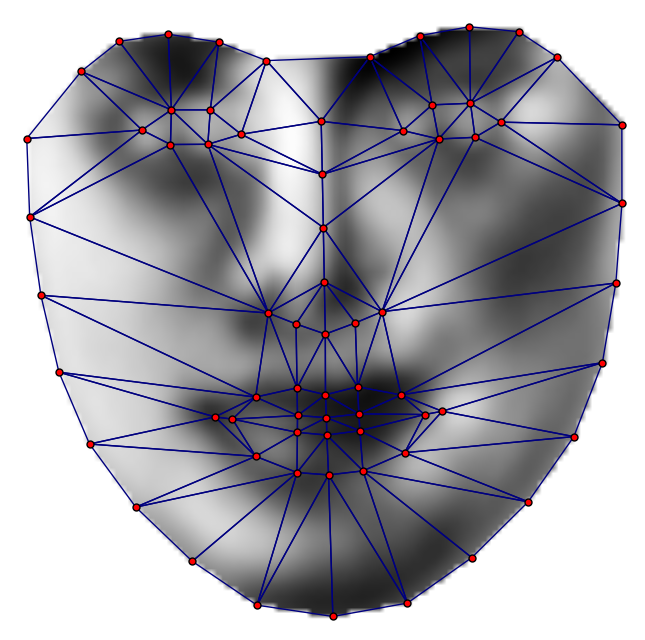

In [5]:
aam.view_appearance_models_widget()

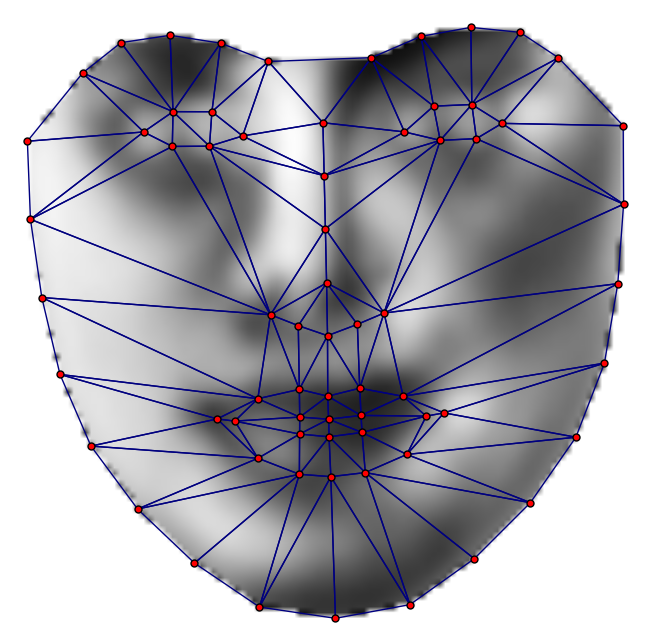

In [6]:
aam.view_aam_widget()

In [ ]:
from menpofit.aam import PatchAAM
from menpo.feature import fast_dsift

patch_aam = PatchAAM(training_images, group='PTS', patch_shape=[(15, 15), (23, 23)],
                     diagonal=150, scales=(0.5, 1.0), holistic_features=fast_dsift,
                     max_shape_components=20, max_appearance_components=150,
                     verbose=True)


- Computing reference shape                                                     Computing batch 0
- Building modelsges size: [==========] 100% (811/811) - done.                  
  - Scale 0: Extracting patches: [=======   ] 71% (579/811) - 00:00:06 remainingaining